In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 데이터를 입력합니다.
df = pd.read_csv(
    'https://raw.githubusercontent.com/gilbutITbook/080324/master/data/wine.csv',
    header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [19]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [20]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=500,
                    validation_split=0.25)  # 0.8 x 0.25 = 0.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 0s 15ms/step - loss: 8.2095 - accuracy: 0.2453 - val_loss: 3.1092 - val_accuracy: 0.2446
Epoch 2/50
8/8 [==============================] -

In [60]:
# 모델 저장합니다.
model.save('test.h5')

In [65]:
test = tf.keras.models.load_model('test.h5')
new_x = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
test.predict(new_x)

1/1 [==============================] - 0s 45ms/step


array([[1.]], dtype=float32)

In [5]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

In [21]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 792us/step - loss: 0.1851 - accuracy: 0.9362
Test accuracy: 0.9361538290977478


In [22]:
# 모델 저장의 조건을 설정합니다.
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=500,
                    validation_split=0.25,
                    verbose=2,
                    callbacks=[checkpointer])

Epoch 1/50

Epoch 1: saving model to ./data/model/all\01-0.9492.hdf5
8/8 - 0s - loss: 0.1648 - accuracy: 0.9412 - val_loss: 0.1440 - val_accuracy: 0.9492 - 57ms/epoch - 7ms/step
Epoch 2/50

Epoch 2: saving model to ./data/model/all\02-0.9485.hdf5
8/8 - 0s - loss: 0.1639 - accuracy: 0.9423 - val_loss: 0.1429 - val_accuracy: 0.9485 - 38ms/epoch - 5ms/step
Epoch 3/50

Epoch 3: saving model to ./data/model/all\03-0.9492.hdf5
8/8 - 0s - loss: 0.1626 - accuracy: 0.9433 - val_loss: 0.1421 - val_accuracy: 0.9492 - 40ms/epoch - 5ms/step
Epoch 4/50

Epoch 4: saving model to ./data/model/all\04-0.9485.hdf5
8/8 - 0s - loss: 0.1615 - accuracy: 0.9425 - val_loss: 0.1414 - val_accuracy: 0.9485 - 39ms/epoch - 5ms/step
Epoch 5/50

Epoch 5: saving model to ./data/model/all\05-0.9492.hdf5
8/8 - 0s - loss: 0.1607 - accuracy: 0.9438 - val_loss: 0.1405 - val_accuracy: 0.9492 - 38ms/epoch - 5ms/step
Epoch 6/50

Epoch 6: saving model to ./data/model/all\06-0.9492.hdf5
8/8 - 0s - loss: 0.1596 - accuracy: 0.944

Epoch 47/50

Epoch 47: saving model to ./data/model/all\47-0.9623.hdf5
8/8 - 0s - loss: 0.1188 - accuracy: 0.9548 - val_loss: 0.1031 - val_accuracy: 0.9623 - 37ms/epoch - 5ms/step
Epoch 48/50

Epoch 48: saving model to ./data/model/all\48-0.9600.hdf5
8/8 - 0s - loss: 0.1175 - accuracy: 0.9559 - val_loss: 0.1025 - val_accuracy: 0.9600 - 34ms/epoch - 4ms/step
Epoch 49/50

Epoch 49: saving model to ./data/model/all\49-0.9623.hdf5
8/8 - 0s - loss: 0.1177 - accuracy: 0.9546 - val_loss: 0.1010 - val_accuracy: 0.9623 - 33ms/epoch - 4ms/step
Epoch 50/50

Epoch 50: saving model to ./data/model/all\50-0.9608.hdf5
8/8 - 0s - loss: 0.1168 - accuracy: 0.9556 - val_loss: 0.1006 - val_accuracy: 0.9608 - 33ms/epoch - 4ms/step


In [8]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=500,
                    verbose=0,
                    validation_split=0.25)

In [9]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.078031,0.975879,0.068780,0.980000
1,0.077004,0.976905,0.068707,0.979231
2,0.077148,0.977162,0.069016,0.979231
3,0.075790,0.978445,0.067702,0.979231
4,0.075562,0.977162,0.069679,0.979231
...,...,...,...,...
1995,0.011451,0.996921,0.080629,0.986923
1996,0.010386,0.997691,0.103080,0.981538
1997,0.015995,0.994868,0.117237,0.978462
1998,0.014679,0.995381,0.100221,0.981538


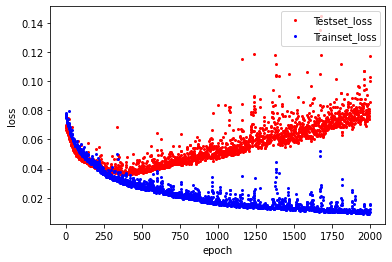

In [10]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
# load_model 저장한 모델을 불러옵니다.
# https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko
from tensorflow import keras

model = keras.models.load_model('./data/model/all/14-0.9800.hdf5')

In [16]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 903us/step - loss: 0.0973 - accuracy: 0.9685
Test accuracy: 0.9684615135192871


In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=0,
                               save_best_only=True)

#모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=500,
                    validation_split=0.25,
                    verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

In [24]:
import tensorflow as tf
from glob import glob

modelList = glob('data/model/all/*.hdf5')
modelList

['data/model/all\\01-0.9492.hdf5',
 'data/model/all\\02-0.9485.hdf5',
 'data/model/all\\03-0.9492.hdf5',
 'data/model/all\\04-0.9485.hdf5',
 'data/model/all\\05-0.9492.hdf5',
 'data/model/all\\06-0.9492.hdf5',
 'data/model/all\\07-0.9485.hdf5',
 'data/model/all\\08-0.9492.hdf5',
 'data/model/all\\09-0.9492.hdf5',
 'data/model/all\\10-0.9500.hdf5',
 'data/model/all\\11-0.9508.hdf5',
 'data/model/all\\12-0.9500.hdf5',
 'data/model/all\\13-0.9508.hdf5',
 'data/model/all\\14-0.9508.hdf5',
 'data/model/all\\15-0.9508.hdf5',
 'data/model/all\\16-0.9515.hdf5',
 'data/model/all\\17-0.9515.hdf5',
 'data/model/all\\18-0.9515.hdf5',
 'data/model/all\\19-0.9500.hdf5',
 'data/model/all\\20-0.9515.hdf5',
 'data/model/all\\21-0.9538.hdf5',
 'data/model/all\\22-0.9508.hdf5',
 'data/model/all\\23-0.9538.hdf5',
 'data/model/all\\24-0.9523.hdf5',
 'data/model/all\\25-0.9546.hdf5',
 'data/model/all\\26-0.9554.hdf5',
 'data/model/all\\27-0.9546.hdf5',
 'data/model/all\\28-0.9562.hdf5',
 'data/model/all\\29

In [50]:
# 테스트 결과를 출력합니다.
# 정확도가 0.9 이상인 모델만 로드해서 결과 출력
for modelPath in modelList:
    tmp = modelPath.split('\\')
    filename = tmp[len(tmp) - 1]
    tmp = filename.split('-')
    filename = tmp[len(tmp) - 1]
    accuracy = float(filename[:6])

    if accuracy > 0.9:
        model = tf.keras.models.load_model(modelPath)
        score = model.evaluate(X_test, y_test)
        print('Test accuracy:', modelPath, score[1])

41/41 [==============================] - 0s 970us/step - loss: 0.1829 - accuracy: 0.9385
Test accuracy: data/model/all\01-0.9492.hdf5 0.9384615421295166
41/41 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9400
Test accuracy: data/model/all\02-0.9485.hdf5 0.9399999976158142
41/41 [==============================] - 0s 876us/step - loss: 0.1807 - accuracy: 0.9400
Test accuracy: data/model/all\03-0.9492.hdf5 0.9399999976158142
41/41 [==============================] - 0s 733us/step - loss: 0.1797 - accuracy: 0.9400
Test accuracy: data/model/all\04-0.9485.hdf5 0.9399999976158142
41/41 [==============================] - 0s 889us/step - loss: 0.1790 - accuracy: 0.9400
Test accuracy: data/model/all\05-0.9492.hdf5 0.9399999976158142
41/41 [==============================] - 0s 867us/step - loss: 0.1781 - accuracy: 0.9408
Test accuracy: data/model/all\06-0.9492.hdf5 0.9407692551612854
41/41 [==============================] - 0s 876us/step - loss: 0.1765 - accuracy: 0.

In [37]:
X_test.values[:1]

array([[11.7    ,  0.28   ,  0.47   ,  1.7    ,  0.054  , 17.     ,
        32.     ,  0.99686,  3.15   ,  0.67   , 10.6    ,  7.     ]])

In [38]:
X_test.values[0]

array([11.7    ,  0.28   ,  0.47   ,  1.7    ,  0.054  , 17.     ,
       32.     ,  0.99686,  3.15   ,  0.67   , 10.6    ,  7.     ])

In [59]:
# 임계구역 조정
# 임계값의 기본값은 0.5이지만 상황에 따라서 조정 가능
# result 값을 0이나 1로 만들고 그 후에 오차행렬표(혼동행렬)을 제작해야함
criticals = [0.4, 0.5, 0.6, 0.7]

for critical in criticals:
    result = model.predict(X_test)
    result[result < critical] = 0
    result[result >= critical] = 1

    print(critical)
    print(np.unique(y_test == result[:, 0], return_counts=True))

41/41 [==============================] - 0s 799us/step
0.4
(array([False,  True]), array([  60, 1240], dtype=int64))
41/41 [==============================] - 0s 838us/step
0.5
(array([False,  True]), array([  61, 1239], dtype=int64))
41/41 [==============================] - 0s 743us/step
0.6
(array([False,  True]), array([  72, 1228], dtype=int64))
41/41 [==============================] - 0s 551us/step
0.7
(array([False,  True]), array([  74, 1226], dtype=int64))
